In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy 
import math
import matplotlib as mpl

In [2]:
# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
mpl.rc('font', **font)

# Set the background color of the plot to ghostwhite
axes = {'facecolor': 'ghostwhite'}
mpl.rc('axes', **axes)

# Set custom color cycle
custom_colors= ['dodgerblue', 'red', 'lightgreen', 'orange', 'orchid', 'navy']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

# Set inside tickmarks
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True

# Exercise 1

In [3]:
dust = np.loadtxt('DustLog_forClass.dat.txt')

In [4]:
# Add 1D interpolation to the data 
x = dust[:,0]   # Depth in m 
y = dust[:,1]   # Dust logger values 
f_linear = scipy.interpolate.interp1d(x, y, kind='linear') 
f_cubic = scipy.interpolate.interp1d(x, y, kind='cubic')

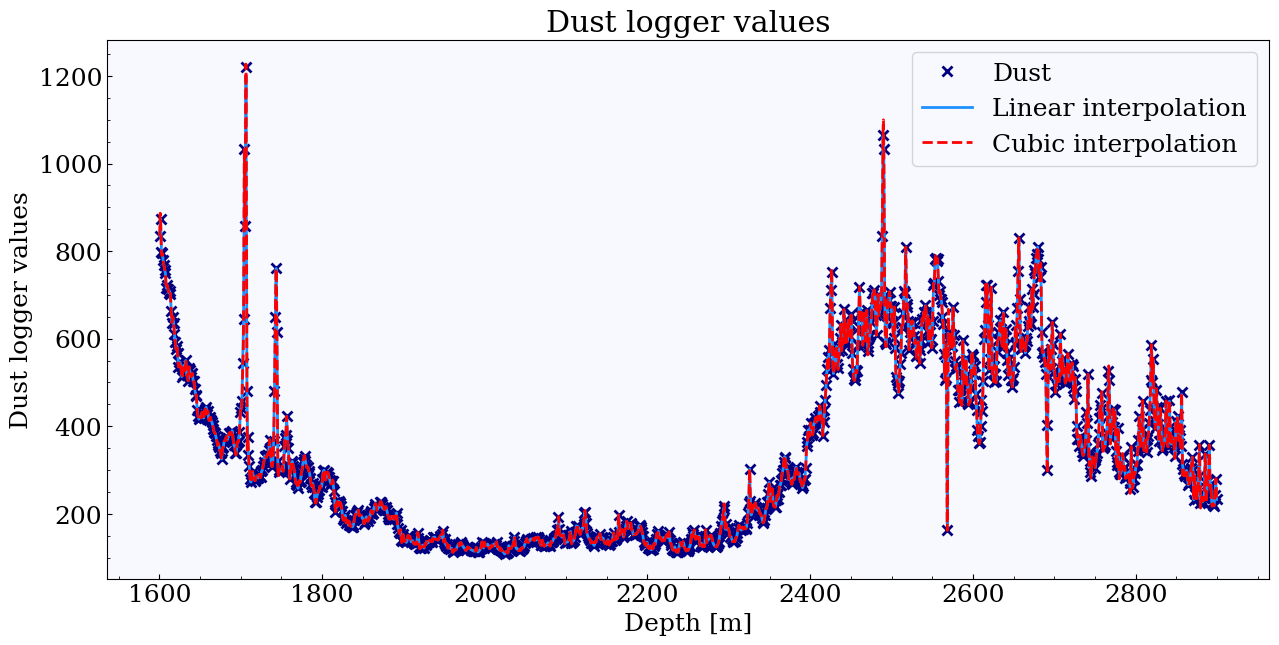

In [5]:
x_axis = np.linspace(x.min(), x.max(), len(x)*10)    # Interpolation axis

fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(x, y, 'x', color='navy', label='Dust', ms=7, mew=2)
ax.plot(x_axis, f_linear(x_axis), label='Linear interpolation', lw=2)
ax.plot(x_axis, f_cubic(x_axis), '--', label='Cubic interpolation', lw=2)

ax.set(xlabel='Depth [m]', 
       ylabel='Dust logger values', 
       title='Dust logger values')

ax.legend(); 

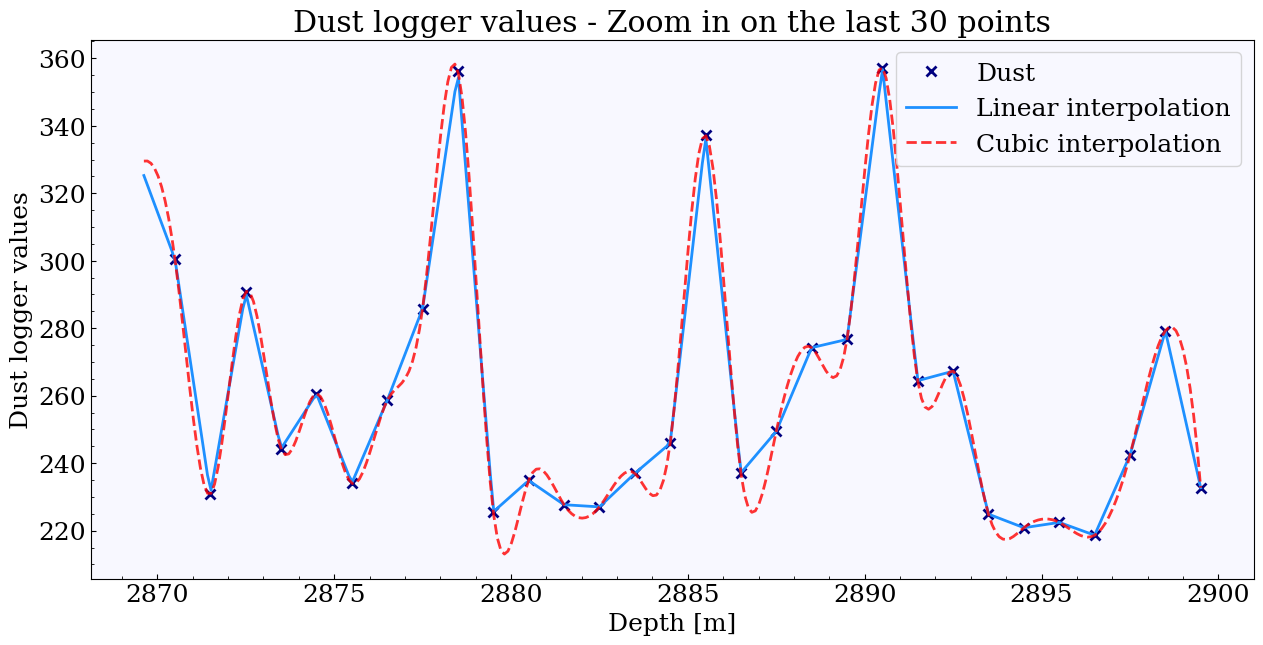

In [6]:
zoom_idx = 30 

fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(x[-zoom_idx:], y[-zoom_idx:], 'x', color='navy', label='Dust', ms=7, markeredgewidth=2)
ax.plot(x_axis[-zoom_idx*10:], f_linear(x_axis[-zoom_idx*10:]), label='Linear interpolation', lw=2)
ax.plot(x_axis[-zoom_idx*10:], f_cubic(x_axis[-zoom_idx*10:]), '--', alpha=0.8, label='Cubic interpolation', lw=2)

ax.set(xlabel='Depth [m]', 
       ylabel='Dust logger values', 
       title='Dust logger values - Zoom in on the last 30 points')

ax.legend(); 

# Exercise 2 

In [7]:
data = np.loadtxt('SplineCubic.txt')
x = data[:,0]
y = data[:,1]
logy = np.log(y)
logy /= scipy.integrate.trapz(logy, x)

f_linear = scipy.interpolate.interp1d(x, logy, kind='linear')
f_quadratic = scipy.interpolate.interp1d(x, logy, kind='quadratic')
f_cubic = scipy.interpolate.interp1d(x, logy, kind='cubic')

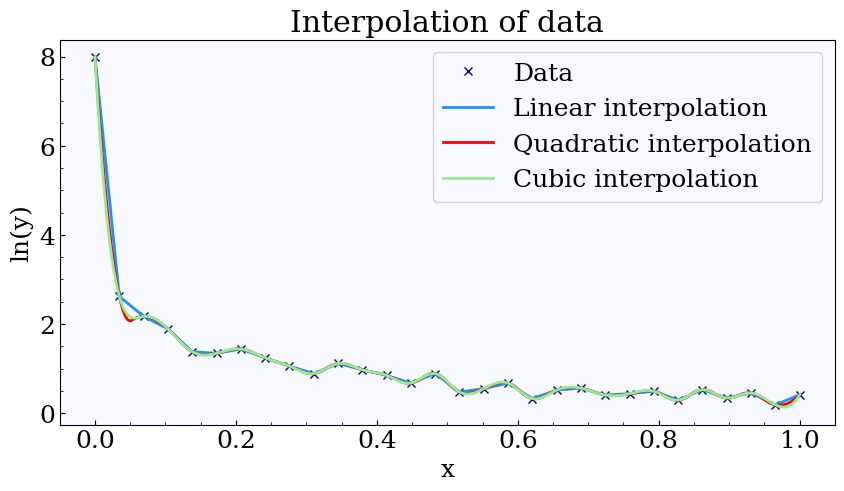

In [8]:
x_axis = np.linspace(x.min(), x.max(), len(x)*10)

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(x, logy, 'x', color='navy', label='Data', ms=6, markeredgewidth=1)
ax.plot(x_axis, f_linear(x_axis), label='Linear interpolation', lw=2)
ax.plot(x_axis, f_quadratic(x_axis), label='Quadratic interpolation', lw=2)
ax.plot(x_axis, f_cubic(x_axis), label='Cubic interpolation', lw=2)

ax.set(xlabel='x',
       ylabel='ln(y)',
       title='Interpolation of data')

ax.legend();

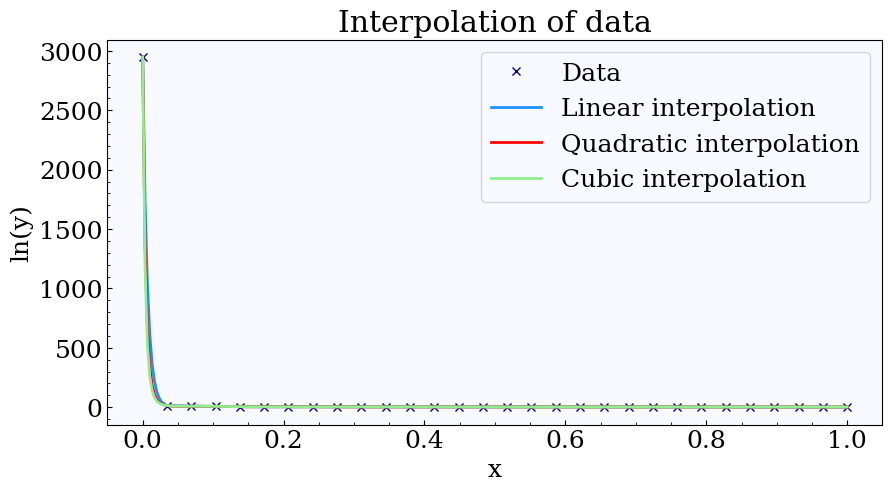

In [9]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(x, np.exp(logy), 'x', color='navy', label='Data', ms=6, markeredgewidth=1)
ax.plot(x_axis, np.exp(f_linear(x_axis)), label='Linear interpolation', lw=2)
ax.plot(x_axis, np.exp(f_quadratic(x_axis)), label='Quadratic interpolation', lw=2)
ax.plot(x_axis, np.exp(f_cubic(x_axis)), label='Cubic interpolation', lw=2)

ax.set(xlabel='x',
       ylabel='ln(y)',
       title='Interpolation of data')

ax.legend();

In [10]:
# Calculate the integral of the data 
integral_data = scipy.integrate.trapz(logy, x)

# Calculate the integral of the interpolated functions
integral_lin = scipy.integrate.trapz(f_linear(x_axis), x_axis)
integral_quad = scipy.integrate.trapz(f_quadratic(x_axis), x_axis)
integral_cub = scipy.integrate.trapz(f_cubic(x_axis), x_axis)

print(f'Integral of data: {integral_data:.2f}')
print(f'Integral of linear interpolation: {integral_lin:.2f}')
print(f'Integral of quadratic interpolation: {integral_quad:.2f}')
print(f'Integral of cubic interpolation: {integral_cub:.2f}')

Integral of data: 1.00
Integral of linear interpolation: 1.00
Integral of quadratic interpolation: 0.97
Integral of cubic interpolation: 0.97


In [38]:
data = np.loadtxt('SplineOsc1.txt')
E = data[:,0]
P = data[:,1]


inter = scipy.interpolate.splrep(E, P, k=3)

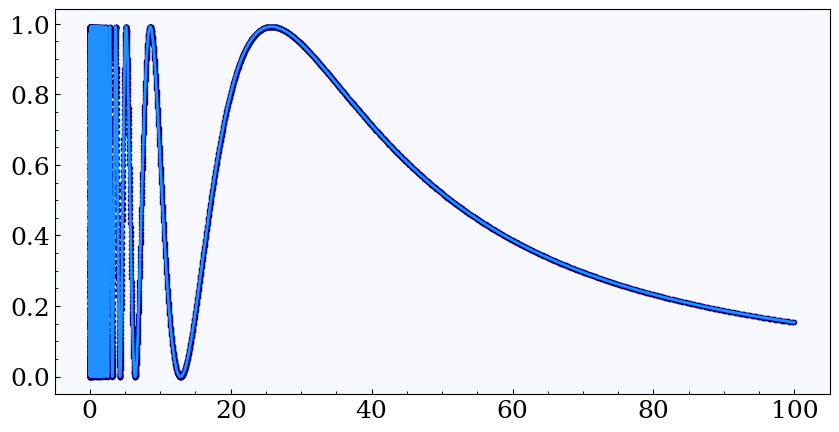

In [44]:
E_axis = np.linspace(E.min(), E.max(), len(E)*10)

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(E, P, '.', color='navy', label='Data', ms=6, markeredgewidth=1)
ax.plot(E_axis, scipy.interpolate.splev(E_axis, inter), label='Spline interpolation', lw=2)


If you spline the data in the file, at what energy is the sampling rate of the data too sparse to accurately reflect the true oscillation probability?
Approx. at E = 0.55

In [52]:
np.mean(P[E>0.5])
np.mean(scipy.interpolate.splev(E_axis, inter)[E_axis>0.5])

0.4706816872663242